In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
demo = pd.read_csv('Dataset//Internet-Demographic.csv')

In [3]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    195 non-null    object 
 1   Country Code    195 non-null    object 
 2   Birth rate      195 non-null    float64
 3   Internet users  195 non-null    float64
 4   Income Group    195 non-null    object 
dtypes: float64(2), object(3)
memory usage: 7.7+ KB


In [4]:
demo['Country Name'] = demo['Country Name'].astype('category')
demo['Country Code'] = demo['Country Code'].astype('category')
demo['Income Group'] = demo['Income Group'].astype('category')

In [5]:
demo.dtypes

Country Name      category
Country Code      category
Birth rate         float64
Internet users     float64
Income Group      category
dtype: object

In [6]:
demo.isnull().sum()

Country Name      0
Country Code      0
Birth rate        0
Internet users    0
Income Group      0
dtype: int64

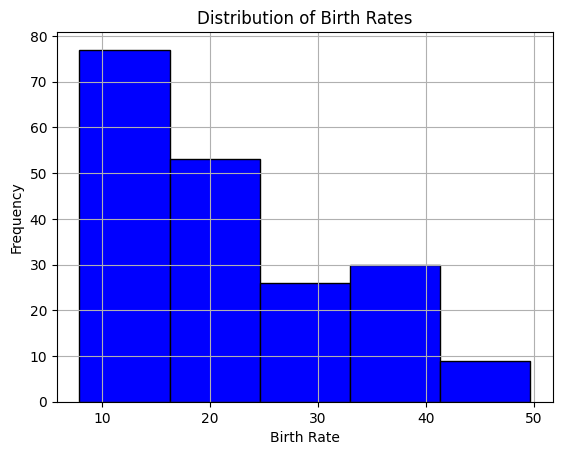

In [7]:
plt.hist(demo["Birth rate"], bins=5, color='blue', edgecolor='black')
plt.xlabel('Birth Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Birth Rates')
plt.grid(True)
plt.show()

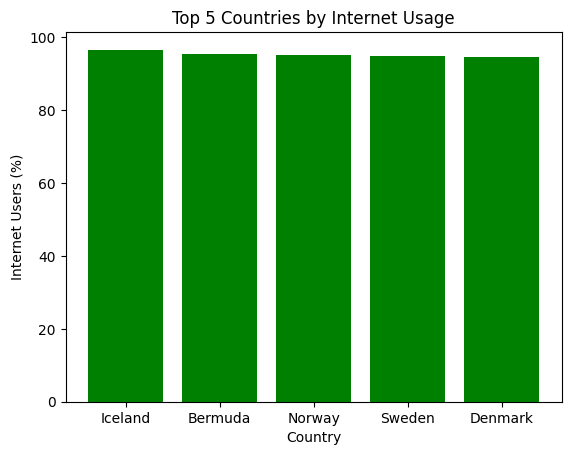

In [8]:
top_5 = demo.nlargest(5, "Internet users")  # Get top 5 countries

plt.bar(top_5["Country Name"], top_5["Internet users"], color='green')
plt.xlabel('Country')
plt.ylabel('Internet Users (%)')
plt.title('Top 5 Countries by Internet Usage')
plt.show()


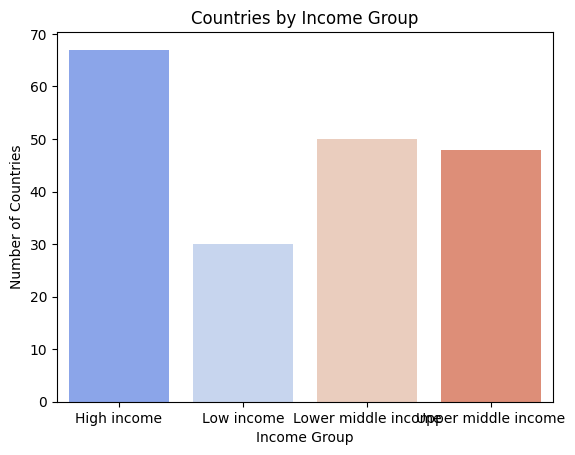

In [9]:
sns.countplot(x=demo["Income Group"], palette='coolwarm')
plt.xlabel('Income Group')
plt.ylabel('Number of Countries')
plt.title('Countries by Income Group')
plt.show()


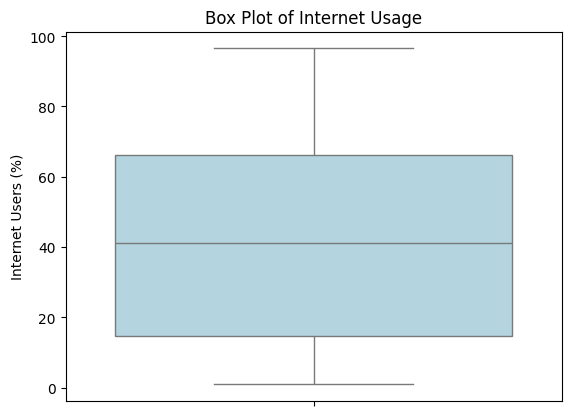

In [10]:
sns.boxplot(y=demo["Internet users"], color='lightblue')
plt.ylabel('Internet Users (%)')
plt.title('Box Plot of Internet Usage')
plt.show()


In [11]:
no_internet = demo[demo["Internet users"] == 0][["Country Name", "Country Code"]]
print("Countries with No Internet Access:")
print(no_internet)


Countries with No Internet Access:
Empty DataFrame
Columns: [Country Name, Country Code]
Index: []


In [12]:
avg_birth_rate = demo["Birth rate"].mean()
print(f'Average Birth Rate: {avg_birth_rate:.2f}')


Average Birth Rate: 21.47


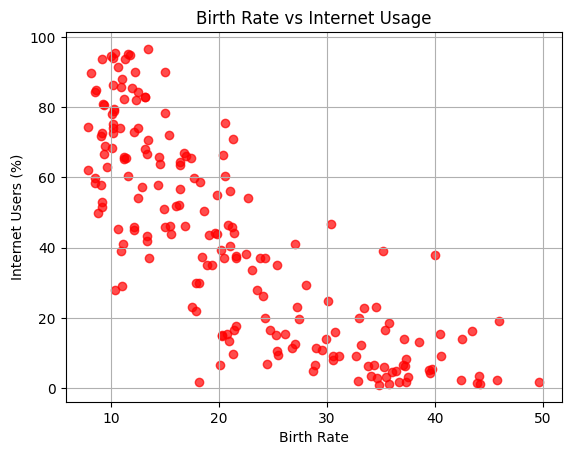

In [13]:
plt.scatter(demo["Birth rate"], demo["Internet users"], color='red', alpha=0.7)
plt.xlabel('Birth Rate')
plt.ylabel('Internet Users (%)')
plt.title('Birth Rate vs Internet Usage')
plt.grid(True)
plt.show()


In [14]:
high_birth_rate = demo[demo["Birth rate"] > 40]
print("Countries with Birth Rates Above 40:\n", high_birth_rate[["Country Name", "Birth rate"]])


Countries with Birth Rates Above 40:
          Country Name  Birth rate
2              Angola      45.985
11            Burundi      44.151
14       Burkina Faso      40.551
65        Gambia, The      42.525
115              Mali      44.138
127             Niger      49.661
128           Nigeria      40.045
156           Somalia      43.891
167              Chad      45.745
178            Uganda      43.474
192  Congo, Dem. Rep.      42.394
193            Zambia      40.471


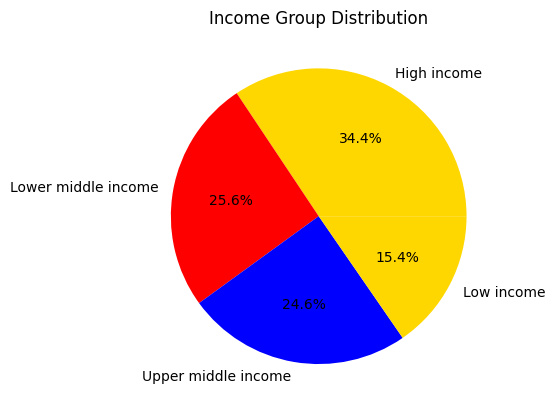

In [15]:
demo["Income Group"].value_counts().plot.pie(autopct='%1.1f%%', colors=['gold', 'red', 'blue'])
plt.title('Income Group Distribution')
plt.ylabel('')
plt.show()


In [16]:
correlation = demo["Birth rate"].corr(demo["Internet users"])
print(f'Correlation between Birth Rate and Internet Users: {correlation:.2f}')


Correlation between Birth Rate and Internet Users: -0.82
